## 1. Business understanding
- Our goal is:
    1. to find optimal locations for drone hub stations
    2. To find interesting  relationships between variables / products.

### Expectations
- We expect to find optimal locations for the hub stations from the data in a way that it can be represented easily.
- The same goes for the second task. We expect to find relationships between the variables which the company can utilize in their marketing / sales.



## 2. Data understainding
### Dataset: drone_cust_locations
- There are three variables: CustomerId, x and y. CustomerId is self-explanatory, x and y are locations when plotted into a 2D plane.

- The data has no null values and has correct format for the next steps. => Data has no quality issues.

### Dataset: drone_prod_groups
- ID = transactionID
- Prod1, ..., Prod20 - Binary variables indicating whether at least one product from a particular group was purchased in the transaction. A value of 1 indicates that at least one product from the group was purchased, while a value of 0 indicates that no products from the group were purchased.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mlxtend.frequent_patterns import apriori, association_rules

df_locations = pd.read_csv("drone_cust_locations.csv", sep=';')
df_products = pd.read_csv("drone_prod_groups.csv", sep=';')
df_locations.head()
df_products.head()

,"ID,Prod1, Prod2, Prod3, Prod4, Prod5, Prod6, Prod7, Prod8, Prod9, Prod10, Prod11, Prod12, Prod13, Prod14, Prod15, Prod16, Prod17, Prod18, Prod19, Prod20"
0,"1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1"
1,"2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1"
2,"3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1"
3,"4, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1"
4,"5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1"


In [100]:
df_locations.describe()

,clientid,x,y
count,5956.000000,5956.000000,5956.000000
mean,2978.500000,508.823177,427.554772
std,1719.493433,271.061462,289.044640
min,1.000000,0.017692,0.043285
25%,1489.750000,282.582920,170.079921
50%,2978.500000,518.100892,397.786441
75%,4467.250000,727.156497,669.982518
max,5956.000000,999.533215,999.731720


In [101]:

df_locations.info()
df_products.info()
print(df_locations.describe())
print(df_products.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956 entries, 0 to 5955
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  5956 non-null   int64  
 1   x         5956 non-null   float64
 2   y         5956 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 139.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column                                                                                                                                                    Non-Null Count   Dtype 
---  ------                                                                                                                                                    --------------   ----- 
 0   ID,Prod1, Prod2, Prod3, Prod4, Prod5, Prod6, Prod7, Prod8, Prod9, Prod10, Prod11, Prod12, Prod13, Prod14, Prod15, Prod16, Prod17, Prod18, Prod19, Prod20  100000 non-nu

In [102]:
print(df_locations.isnull().sum())
print(df_products.isnull().sum())

clientid    0
x           0
y           0
dtype: int64
ID,Prod1, Prod2, Prod3, Prod4, Prod5, Prod6, Prod7, Prod8, Prod9, Prod10, Prod11, Prod12, Prod13, Prod14, Prod15, Prod16, Prod17, Prod18, Prod19, Prod20    0
dtype: int64


## 3. Data preparation
- The first dataset didn't need any cleaning. the variable values are in correct form.
- The second dataset needed some cleaning. We had to drop the ID column and convert the transaction data to boolean format.

In [103]:

# Drop 'ID' column from df_products if it exists
if 'ID' in df_products.columns:
    df_products = df_products.drop(columns=['ID'])

# Convert transaction data to boolean format
df_products_bool = df_products.map(lambda x: True if x == 1 else False)

## 4. Modeling
### We are using the K-means algorithm.
- Preparing the data for clustering by giving them to the variable X.
- You can find the map below. It shows the three clusters and their center points. Those are the optimal locations for the HUBs.

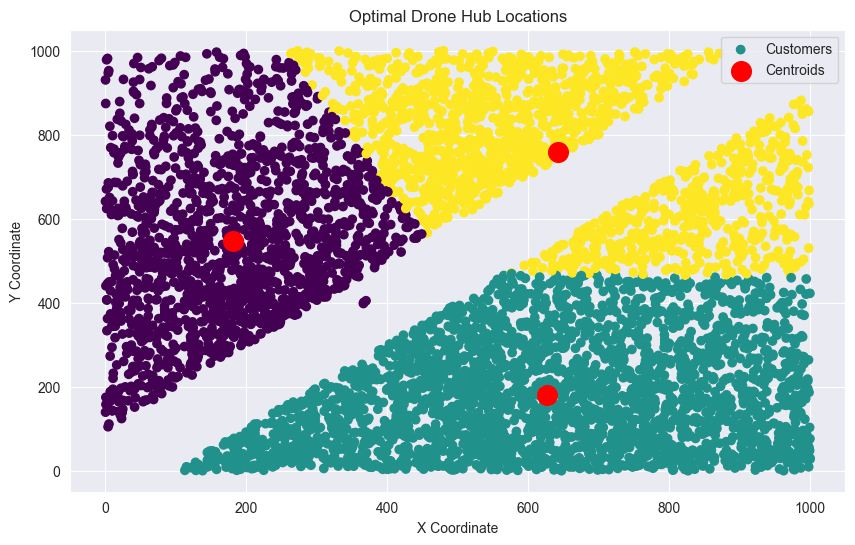

In [104]:
X = df_locations[['x', 'y']]
optimal_k = 3  
model = KMeans(n_clusters=optimal_k, random_state=42)
model.fit(X)
df_locations['cluster'] = model.labels_

centroids = model.cluster_centers_
plt.figure(figsize=(10, 6))
plt.scatter(df_locations['x'], df_locations['y'], c=df_locations['cluster'], cmap='viridis', marker='o', label='Customers')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', s=200, label='Centroids')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Optimal Drone Hub Locations')
plt.legend()
plt.show()

### Centroids:

In [105]:
model.cluster_centers_

array([[180.89854774, 546.02319994],
       [626.30514798, 179.0966322 ],
       [641.78201689, 758.34167274]])

In [106]:


new_data = np.array([[600, 709], [100, 500], [630, 200]])

new_data_df = pd.DataFrame(new_data, columns=['x', 'y'])

# Predict the cluster for new data points
predictions = model.predict(new_data_df)

# Print the predictions
print("Cluster predictions for new data points:", predictions)

Cluster predictions for new data points: [2 0 1]


### Predict method correctly assigns the values their cluster

## Performance
### We will evaluate the performance by measuring the inerta (WCSS) as it gives us the optimal amount for K values.


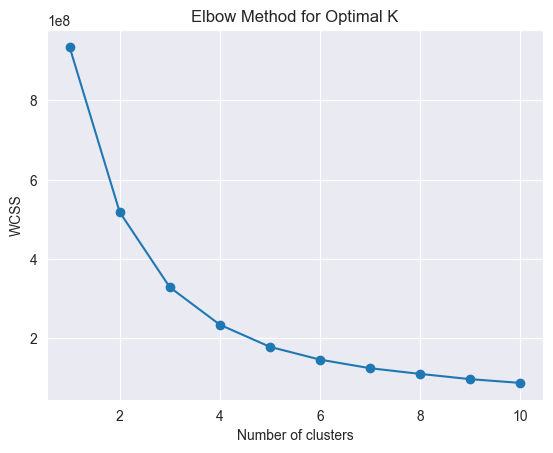

In [107]:
wcss = []
for i in range(1, 11):
    model = KMeans(init='random', n_clusters=i, random_state=42).fit(X)
    wcss.append(model.inertia_)

plt.plot(range(1, 11), wcss, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

- Quality of the clustering: Inertia (WCSS). In the above plot, the line forms an "elbow". The optimal K - value is usually found near it. In this case it seems to be 4 or 5 as it decreases more slowly.


## 5 - Evaluation

In [108]:
# best k using silhouette score
silhouette_scores = []
for i in range(2, 11):  
    model = KMeans(init='random', n_clusters=i, random_state=42).fit(X)
    labels = model.labels_
    silhouette_scores.append(silhouette_score(X, labels))

optimal_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))] 

print(f"Optimal Number of Clusters: {optimal_k}")
print(f"Best Silhouette Score: {max(silhouette_scores):.2f}")



# Association Rule 
frequent_itemsets = apriori(df_products_bool, min_support=0.05, use_colnames=True)
if not frequent_itemsets.empty:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
    print(f"Number of Strong Rules Found: {len(rules)}")
else:
    print("No frequent itemsets found. Try lowering min_support further.")


Optimal Number of Clusters: 2
Best Silhouette Score: 0.42
No frequent itemsets found. Try lowering min_support further.


# Silhouette score
- score of 0.42 suggests that the clusters are reasonably well-defined, but there is some overlap or ambiguity between clusters. There is potential for improvements.

## 6 - Deployment
Deployment Plan:
- Clustering results can be integrated into a customer segmentation strategy for targeted marketing.
- Association rules can help recommend frequently bought products together.
- The final models can be deployed in a dashboard where users can analyze and visualize insights.
